# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [93]:
# RCParams to make plots dark theme
# Skip this cell if you want to keep everything light
plt.rcParams['axes.facecolor'] = 'xkcd:dark gray'
plt.rcParams['figure.facecolor'] = 'xkcd:dark gray'
plt.rcParams['xtick.color'] = 'xkcd:light gray'
plt.rcParams['xtick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['ytick.color'] = 'xkcd:light gray'
plt.rcParams['ytick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['axes.edgecolor'] = 'xkcd:gray'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'xkcd:light gray'
plt.rcParams['text.color'] = 'xkcd:light gray'
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha": 0.3})

### Generate the Cities List by Using the `citipy` Library

In [94]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?APPID={weather_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | onega
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | kultali
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | mongar
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | waddan
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | klyuchi
Process

In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,27.41,82,0,2.82,US,1699850328
1,onega,63.9061,38.1404,24.58,85,87,13.87,RU,1699850571
2,cockburn town,21.4612,-71.1419,83.01,76,3,20.38,TC,1699850534
3,kodiak,57.7900,-152.4072,31.51,74,75,6.91,US,1699850573
4,grytviken,-54.2811,-36.5092,36.68,89,100,3.49,GS,1699850574


In [98]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
out_path = "../output_data/"
city_data_df.to_csv(f"{out_path}cities.csv", index_label="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,27.41,82,0,2.82,US,1699850328
1,onega,63.9061,38.1404,24.58,85,87,13.87,RU,1699850571
2,cockburn town,21.4612,-71.1419,83.01,76,3,20.38,TC,1699850534
3,kodiak,57.7900,-152.4072,31.51,74,75,6.91,US,1699850573
4,grytviken,-54.2811,-36.5092,36.68,89,100,3.49,GS,1699850574


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [100]:
# find current date and save it to a variable to pull for later
date = time.localtime(city_data_df['Date'].max())
date_str = f"({date.tm_year}-{date.tm_mon}-{date.tm_mday})"
date_str

'(2023-11-12)'

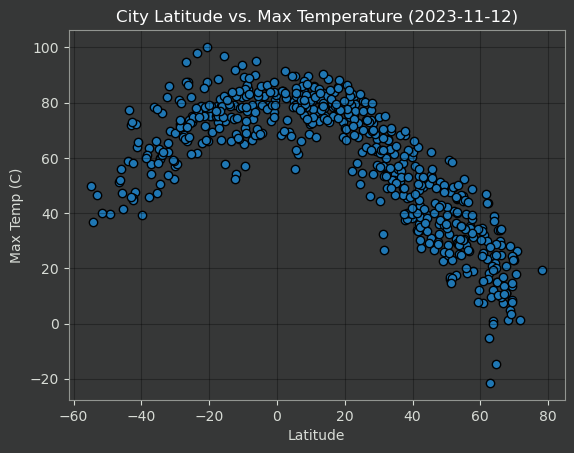

In [101]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig(f"{out_path}Fig-1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

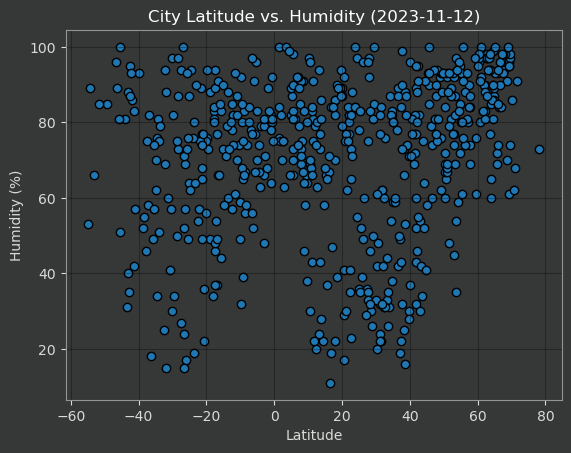

In [102]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig(f"{out_path}Fig-2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

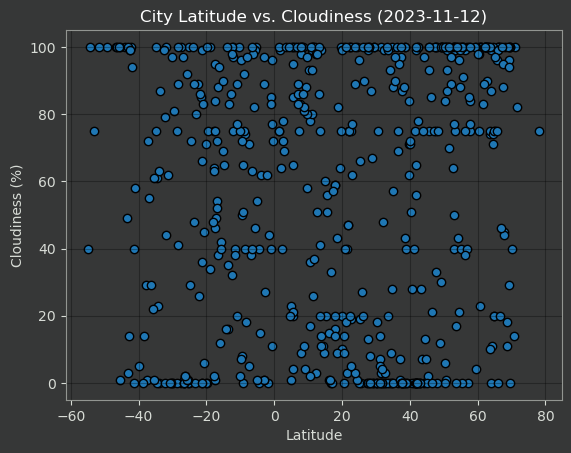

In [103]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig(f"{out_path}Fig-3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

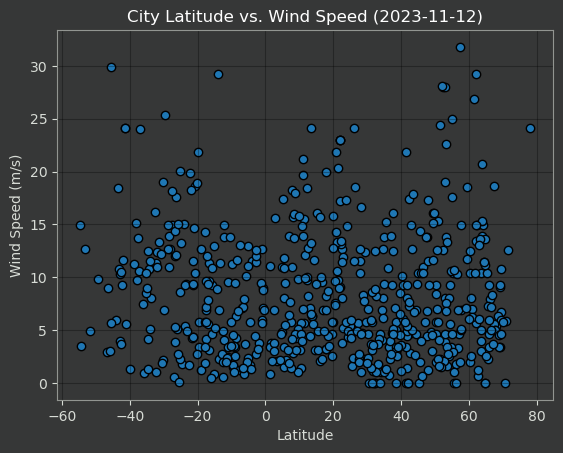

In [104]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='xkcd:black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date_str}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig(f"{out_path}Fig-4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
def lin_reg_plt(x_vals, y_vals, title='', xlab='', ylab='', ann=(0, 0, '15')):

    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)
    regress_vals = x_vals * slope + intercept
    
    plt.scatter(x_vals, y_vals, edgecolors='xkcd:black')
    plt.plot(x_vals, regress_vals, 'r-')
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (ann[0],ann[1]), color='r', fontsize=ann[2])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    print(f'R value is {rval:.2f}')

    return

In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,27.41,82,0,2.82,US,1699850328
1,onega,63.9061,38.1404,24.58,85,87,13.87,RU,1699850571
2,cockburn town,21.4612,-71.1419,83.01,76,3,20.38,TC,1699850534
3,kodiak,57.7900,-152.4072,31.51,74,75,6.91,US,1699850573
5,whitehorse,60.7161,-135.0538,25.57,80,100,8.05,CA,1699850575


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,grytviken,-54.2811,-36.5092,36.68,89,100,3.49,GS,1699850574
9,adamstown,-25.0660,-130.1015,73.00,87,100,20.02,PN,1699850578
10,hithadhoo,-0.6000,73.0833,80.83,80,96,7.09,MV,1699850579
15,bredasdorp,-34.5322,20.0403,59.95,76,61,4.12,ZA,1699850548
16,port-aux-francais,-49.3500,70.2167,39.69,85,100,9.82,TF,1699850547


###  Temperature vs. Latitude Linear Regression Plot

R value is -0.90


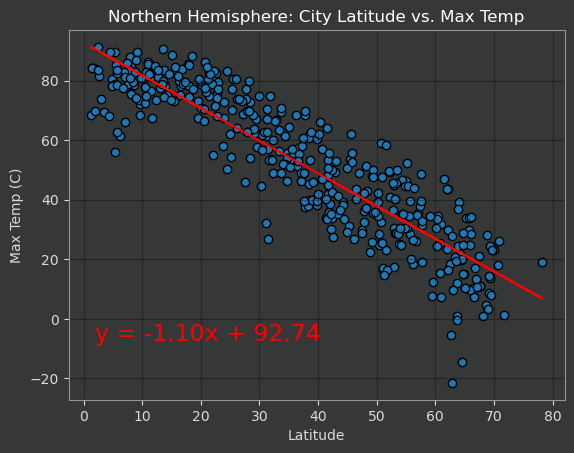

In [108]:
# Linear regression on Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
            ylab='Max Temp (C)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Max Temp', 
            ann=(2, -7.5, 17))

R value is 0.64


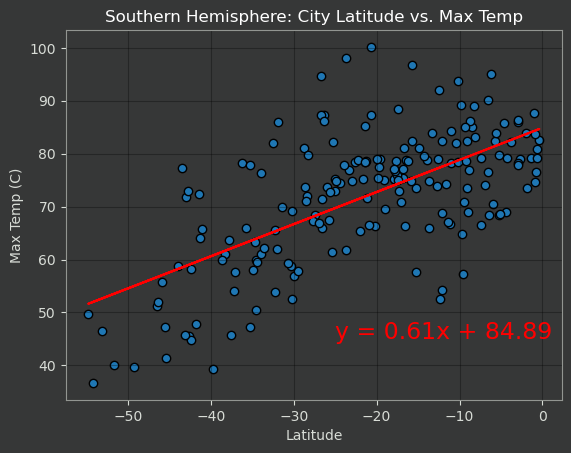

In [109]:
# Linear regression on Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
            ylab='Max Temp (C)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Max Temp', 
            ann=(-25, 45, 17))

**Discussion about the linear relationship:** It seems vary apparent that the closer you are to the equator the higher your max temperature is. Of course there are other factors that effect temperature, such as altitude, nearby mountain ranges, distance from the ocean, wind, vegatation and a few others. So using linear regression between just Latitude and Temperature doesn't paint a perfect picture but it does show that latitude is probably the biggest factor to temperature.

### Humidity vs. Latitude Linear Regression Plot

R value is 0.27


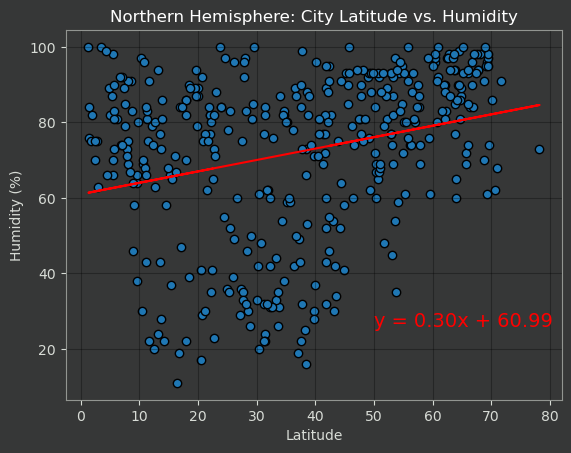

In [110]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
            ylab='Humidity (%)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Humidity', 
            ann=(50, 26, 14))

R value is 0.11


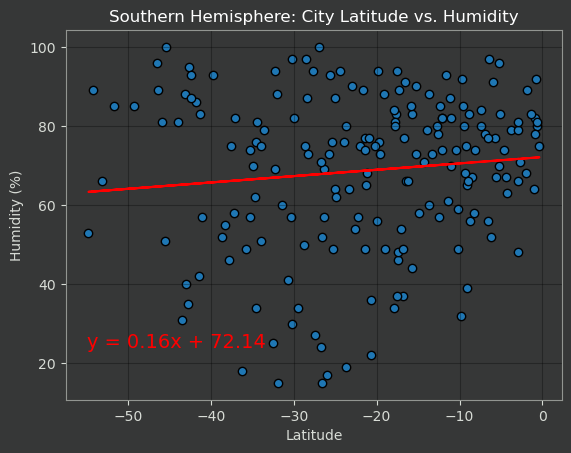

In [111]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
            ylab='Humidity (%)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Humidity', 
            ann=(-55, 24, 14))

**Discussion about the linear relationship:** The corralation between humidity and latitude seem to be rather week but it does appear that in the northern hemisphere the more north you are the more likely your city is to be humid but for the sothern hemisphere it appears to be a lot less apparent I think this is due to the lack of data points for the southern hemisphere, do to there being a lot less landmass in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R value is 0.14


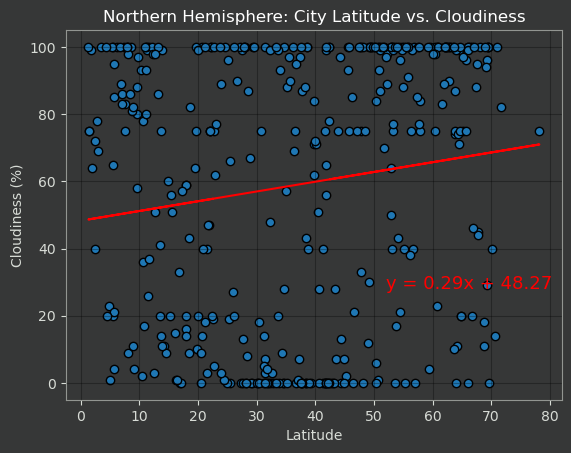

In [112]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
            ylab='Cloudiness (%)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Cloudiness', 
            ann=(52, 28, 13))

R value is -0.01


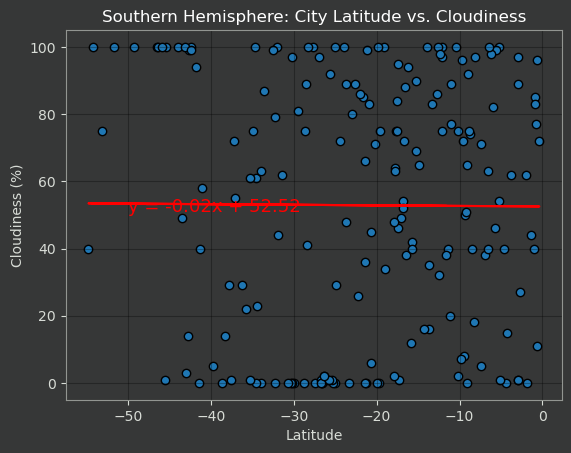

In [113]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
            ylab='Cloudiness (%)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Cloudiness', 
            ann=(-50, 51, 13))

**Discussion about the linear relationship:** There seems to be little to no corralation inbetween latitute and cloudiness, it does appear that in the north there is a little bit of a corraltion but I would assume that's due to some other factor that I'd have to look into more to determine.

### Wind Speed vs. Latitude Linear Regression Plot

R value is 0.02


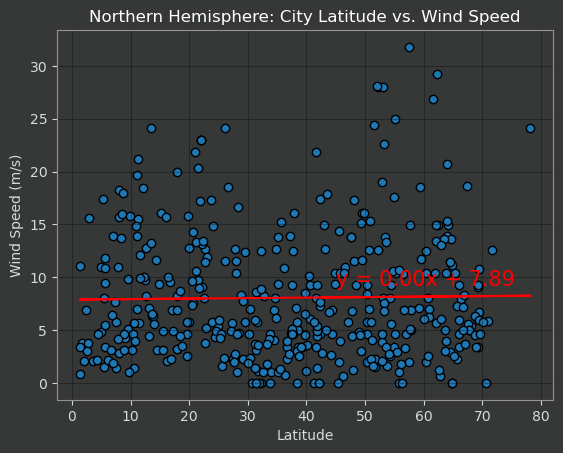

In [114]:
# Northern Hemisphere
lin_reg_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
            ylab='Wind Speed (m/s)', xlab='Latitude', title='Northern Hemisphere: City Latitude vs. Wind Speed', 
            ann=(45, 9.2, 15))

R value is -0.25


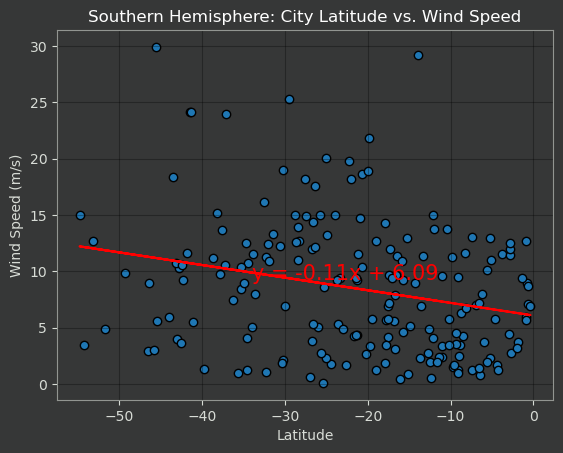

In [115]:
# Southern Hemisphere
lin_reg_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
            ylab='Wind Speed (m/s)', xlab='Latitude', title='Southern Hemisphere: City Latitude vs. Wind Speed', 
            ann=(-34, 9.25, 15))

**Discussion about the linear relationship:** Same as cloudiness this corraltion is so weak and the data is so scattered that it's basically impossible to determine anything from this data visualization except that these two data points don't corralate